# Learning Work Embeddings

## Sentiment Analysis Using LSTM

<h4> Sharat Karekaat </h4>

LSTM - Long Short-Term Memory is an advanced form of Recurrent Neural Network. LSTM effectively addresses RNN's limitations, particularly the vanishing gradient problem, making it superior for remembering long-term dependencies. This neural network integrates complex algorithms and gated cells, allowing it to retain and manipulate memory effectively.

LSTM networks can be used for sentiment analysis, focusing on the ability of LSTM to capture long-range dependencies in textual data. It efficiently processes sequences of words to determine the sentiment of a given text.

In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
tf.random.set_seed(42)

## Dataset - IMDB

In [4]:
imdb = keras.datasets.imdb

max_features = 20000
max_length = 25

(Xtrain, Ytrain), (Xtest, Ytest) = imdb.load_data(num_words = max_features)


print(len(Xtrain), len(Ytrain))
print(len(Xtest), len(Ytest))

Xtrain = keras.preprocessing.sequence.pad_sequences(Xtrain, maxlen =100)
Xtest = keras.preprocessing.sequence.pad_sequences(Xtest, maxlen =100)

print('x_train shape:', Xtrain.shape)
print('x_test shape:', Xtest.shape)

25000 25000
25000 25000
x_train shape: (25000, 100)
x_test shape: (25000, 100)


In [5]:
# Check the unique labels in the dataset
unique, counts = np.unique(Ytrain, return_counts=True)

# Create a dictionary to associate labels with counts
sentiment_counts = dict(zip(unique, counts))

print("Sentiment counts in training data:", sentiment_counts)

Sentiment counts in training data: {0: 12500, 1: 12500}


## LSTM

In [6]:
lstmModel = keras.models.Sequential()

lstmModel.add(keras.layers.Embedding(input_dim = max_features, output_dim = 128,input_shape=[None], mask_zero=True))
#Set the return_sequences parameter of the first LSTM layer to True so that it outputs sequences.
lstmModel.add(keras.layers.LSTM(64, dropout=0.2, return_sequences=True)) #, recurrent_dropout=0.2
lstmModel.add(keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2)) #, recurrent_dropout=0.2
lstmModel.add(keras.layers.Dense(16, activation='relu'))
lstmModel.add(keras.layers.Dense(1, activation = 'sigmoid'))

lstmModel.summary()

c:\Users\045sh\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, None, 128)      │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, None, 64)       │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,622,369 (10.00 MB)

 Trainable params: 2,622,369 (10.00 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 

lstmModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

To prevent overfitting we use Early Stopping. Early stopping stops training when the model stops improving on validation data, Saving computation time by not running unnecessary epochs, and automatically selecting the best model weights

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [9]:
# train the model

h_model = lstmModel.fit(Xtrain, Ytrain, epochs = 15, batch_size=16, validation_split=0.2, callbacks=[early_stopping], verbose=1 )

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 75s 57ms/step - accuracy: 0.7267 - loss: 0.5180 - val_accuracy: 0.8546 - val_loss: 0.3383
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 72s 58ms/step - accuracy: 0.8888 - loss: 0.2777 - val_accuracy: 0.8322 - val_loss: 0.4144
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 61ms/step - accuracy: 0.9314 - loss: 0.1907 - val_accuracy: 0.8432 - val_loss: 0.4928
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 74s 59ms/step - accuracy: 0.9513 - loss: 0.1393 - val_accuracy: 0.8386 - val_loss: 0.5200


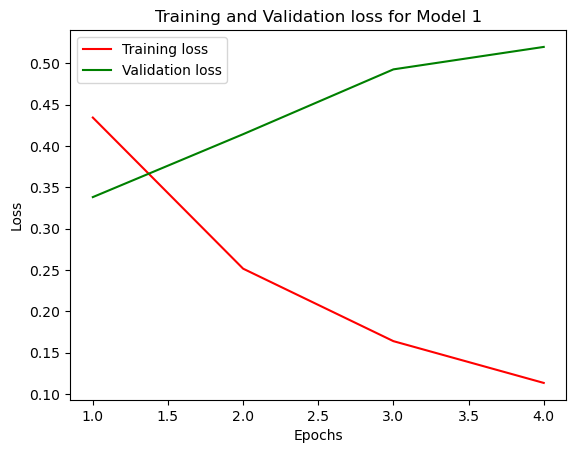

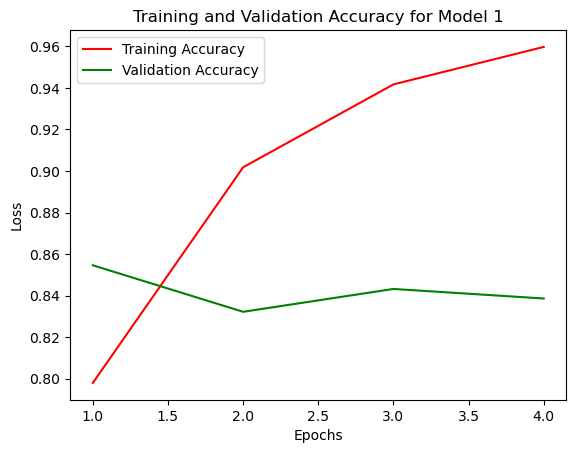

In [10]:
# plotting training and validation loss

loss = h_model.history['loss']
val_loss = h_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and Validation loss for Model 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plotting training and validation Accuracy

acc = h_model.history['accuracy']
val_acc = h_model.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, color='red', label='Training Accuracy')
plt.plot(epochs, val_acc, color='green', label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Model 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
testLoss, testAccuracy = lstmModel.evaluate(Xtest, Ytest)
print(testLoss, testAccuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8435 - loss: 0.3573
0.35150641202926636 0.8459200263023376


## Check the sentiment on new Reviews

In [12]:
new_sentences = [
    "I absolutely loved the movie! It was fantastic.",
    "The film was okay, but I expected more.",
    "I did not like the movie at all.",
    "An excellent film with great performances!",
    "It was the worst movie I've ever seen."
]

In [13]:
# Function to predict sentiment of new reviews
def predict_sentiment(text, word_index=imdb.get_word_index()):
    # Tokenize and convert to sequence
    words = text.lower().split()
    sequence = []
    for word in words:
        if word in word_index:
            sequence.append(word_index[word] + 3)  # Add 3 because of reserved indices
        else:
            sequence.append(2)  # Unknown word
    
    # Pad sequence
    sequence = pad_sequences([sequence], maxlen=100)
    
    # Predict
    prediction = lstmModel.predict(sequence)[0][0]
    return {
        'sentiment': 'Positive' if prediction > 0.5 else 'Negative',
        'confidence': float(prediction if prediction > 0.5 else 1 - prediction)
    }

In [14]:
for idx, sentence in enumerate(new_sentences, 1):
        prediction = predict_sentiment(sentence)
        print(f"Text: {sentence}")
        print(f"Sentiment: {prediction['sentiment']}")
        print(f"Sentiment: {prediction['confidence']}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step
Text: I absolutely loved the movie! It was fantastic.
Sentiment: Positive
Sentiment: 0.5041489601135254
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Text: The film was okay, but I expected more.
Sentiment: Negative
Sentiment: 0.54331836104393
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Text: I did not like the movie at all.
Sentiment: Negative
Sentiment: 0.6053678691387177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Text: An excellent film with great performances!
Sentiment: Positive
Sentiment: 0.9083298444747925
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Text: It was the worst movie I've ever seen.
Sentiment: Negative
Sentiment: 0.9519385434687138


In [15]:
from keras.models import load_model

# Save LSTM model in HDF5 format
lstmModel.save('lstm_model.h5')